In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

We first introduce the definition of the basic concepts in graph embedding. Suppose we are given a graph \( G = (V, E) \), where \( v \in V \) is a vertex or node and \( e \in E \) is an edge. \( G \) is associated with a node type mapping function \( f_v: V \to T_v \) and an edge type mapping function \( f_e: E \to T_e \), where \( T_v \) and \( T_e \) denote the set of node types and edge types, respectively. Each node \( v_i \in V \) belongs to one particular type, i.e., \( f_v(v_i) \in T_v \). Similarly, for \( e_{ij} \in E \), \( f_e(e_{ij}) \in T_e \).

Graph learning is closely related to graph proximities and graph embedding. Graph learning tasks can be broadly abstracted into the following four categories:
- **Node classification** aims at determining the label of nodes (a.k.a. vertices) based on other labeled nodes and the topology of the network.
- **Link prediction** refers to the task of predicting missing links or links that are likely to occur in the future.
- **Clustering** is used to find subsets of similar nodes and group them together.
- **Visualization** helps in providing insights into the structure of the network.

The most basic measure for both dimension reduction and structure preservation of a graph is the graph proximity. Proximity measures are usually adopted to quantify the graph property to be preserved in the embedded space.

The microscopic structures of a graph can be described by its first-order proximity and second-order proximity. The first-order proximity between the vertices is their local pairwise similarity between only the nodes connected by edges.

**Definition 7.10 (First-Order Proximity [144])** The first-order proximity is the observed pairwise proximity between two nodes \( v_i \) and \( v_j \), denoted as \( S_{ij}^{(1)} = s_{ij} \), where \( s_{ij} \) is the edge weight between the two nodes. If no edge is observed between nodes \( i \) and \( j \), then their first-order proximity \( S_{ij}^{(1)} = 0 \).

The first-order proximity is the first and foremost measure of similarity between two nodes. The first-order proximity implies that two nodes in real-world networks are always similar if they are linked by an observed edge. For example, if a paper cites another paper, they should contain some common topic or keywords. However, it is not sufficient to only capture the first-order proximity, and it is also necessary to introduce the second-order proximity to capture the global network structure.

**Definition 7.11 (Second-Order Proximity [144])** Let \( \mathbf{s}_i^{(1)} = [S_{i,1}^{(1)}, \ldots, S_{i,n}^{(1)}]^T \) and \( \mathbf{s}_i^{(2)} = [S_{i,1}^{(2)}, \ldots, S_{i,n}^{(2)}]^T \) be the first-order and the second-order proximity vectors between node \( i \) and other nodes, respectively. Then the second-order proximity \( S_{ij}^{(2)} \) is determined by the similarity of \( \mathbf{s}_i^{(1)} \) and \( \mathbf{s}_j^{(1)} \). If no vertex is linked from/to both \( i \) and \( j \), then the second-order proximity between \( v_i \) and \( v_j \) is zero, i.e., \( S_{ij}^{(2)} = 0 \).

The second-order proximity \( S_{ij}^{(2)} \) is the similarity between \( v_i \)’s neighborhood \( \mathbf{s}_i^{(1)} \) and \( v_j \)’s neighborhood \( \mathbf{s}_j^{(1)} \).

- The first-order proximity compares the similarity between the nodes \( i \) and \( j \). The more similar two nodes are, the larger the first-order proximity value between them.
- The second-order proximity compares the similarity between the nodes’ neighborhood structures. The more similar two nodes’ neighborhoods are, the larger the second-order proximity value between them.

Similarly, we can define the higher-order proximity \( S_{ij}^{(k)} \) (where \( k \geq 3 \)) between a pair of vertices \( (i, j) \) in a graph.

**Definition 7.12 (k-Order Proximity)** Let \( \mathbf{s}_i^{(k)} = [S_{i,1}^{(k)}, \ldots, S_{i,n}^{(k)}]^T \) be the \( k \)-th order proximity vector between node \( i \) and other nodes. Then the \( k \)-th order proximity \( S_{ij}^{(k)} \) is determined by the similarity of \( \mathbf{s}_i^{(k-1)} \) and \( \mathbf{s}_j^{(k-1)} \).

In particular, when \( k \geq 3 \), the \( k \)-th order proximity is generally referred to as the higher-order proximity. The matrix \( S^{(k)} = [S_{ij}^{(k)}] \) is known as the \( k \)-order proximity matrix. When \( k \geq 3 \), \( S^{(k)} \) is called the higher-order proximity matrix. The higher-order proximity matrices are also defined using some other metrics, e.g., Katz Index, Rooted PageRank, Adamic-Adar, etc. that will be discussed in Sect. 7.13.3.

By Definitions 7.10, 7.11, and 7.12, the first-order, second-order, and third-order proximity matrices \( S^{(k)} = [S_{ij}^{(k)}] \in \mathbb{R}^{n \times n} \) (where \( k = 1, 2, 3 \)) are nonnegative matrices, respectively.

If considering the cosine similarity as the \( k \)-order proximity, then for nodes \( v_i \) and \( v_j \), we have the following results:
1. The first-order proximity
$$
S_{ij}^{(1)} = s_{ij}
$$
where \( s_{ij} \) is the edge weight between the two nodes.

2. The second-order proximity
$$
S_{ij}^{(2)} = \frac{\mathbf{s}_i^{(1)} \cdot \mathbf{s}_j^{(1)}}{\| \mathbf{s}_i^{(1)} \|_2 \| \mathbf{s}_j^{(1)} \|_2} = \frac{\sum_{l=1}^{n} S_{i,l}^{(1)} S_{j,l}^{(1)}}{\sqrt{\sum_{l=1}^{n} (S_{i,l}^{(1)})^2} \sqrt{\sum_{l=1}^{n} (S_{j,l}^{(1)})^2}}
$$
In this way, the second-order proximity is between \([0, 1]\).

3. The third-order proximity
$$
S_{ij}^{(3)} = \frac{\| \mathbf{s}_i^{(2)} \|_2 \| \mathbf{s}_j^{(2)} \|_2}{\sum_{l=1}^{n} (S_{i,l}^{(2)})^2 \sum_{l=1}^{n} (S_{j,l}^{(2)})^2}
$$

**Definition 7.13 (Graph Embedding [14, 41])** Given the inputs of a graph \( G = (V, E) \), and a predefined dimensionality of the embedding \( d \) (\( d \ll |V| \)), the graph embedding is to convert \( G \) into a \( d \)-dimensional space \( \mathbb{R}^d \). In this space, the graph properties (such as the first-order, second-order, and higher-order proximities) are preserved as much as possible. The graph is represented as either a \( d \)-dimensional vector (for a whole graph) or a set of \( d \)-dimensional vectors with each vector representing the embedding of part of the graph (e.g., node, edge, substructure). Therefore, a graph embedding maps each node of graph \( G(E, V) \) to a low-dimensional feature vector \( \mathbf{y}_i \) and tries to preserve the connection strengths between vertices. For example, a graph embedding preserving first-order proximity might be obtained by minimizing
$$
\sum_{i,j} s_{ij} \| \mathbf{y}_i - \mathbf{y}_j \|^2_2
$$

Graph embedding is an important method for learning low-dimensional representations of vertices in networks, aiming to capture and preserve the network structure. Learning network representations faces the following great challenges [154]:
1. **High nonlinearity:** The underlying structure of a graph or network is highly nonlinear. Therefore, designing a model to capture the highly nonlinear structure is rather difficult.
2. **Topology structure-preserving:** To support applications in analyzing networks, network embedding is required to preserve the network structure. However, the underlying structure of the network is very complex. The similarity of vertices is dependent on both the local and global network structures. Therefore, how to simultaneously preserve the local

In [1]:
# graph_embedding.py

import networkx as nx
from node2vec import Node2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Create a graph
G = nx.Graph()

# Add nodes and edges
G.add_edges_from([
    (1, 2), (1, 3), (2, 4), (3, 4),
    (4, 5), (5, 6), (6, 7), (7, 5)
])

# Optionally, add node attributes or edge weights
nx.set_node_attributes(G, {1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G'}, 'label')

# Apply Node2Vec
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, sg=1)

# Get node embeddings
embeddings = {node: model.wv[node] for node in G.nodes()}

# Convert embeddings to a matrix
embedding_matrix = [embeddings[node] for node in G.nodes()]

# Perform PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embedding_matrix)

# Create a DataFrame for plotting
df = pd.DataFrame(reduced_embeddings, index=G.nodes(), columns=['x', 'y'])

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(df['x'], df['y'])

for node, (x, y) in df.iterrows():
    plt.text(x, y, str(node), fontsize=12)

plt.title('Node Embeddings Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


Computing transition probabilities:   0%|          | 0/7 [00:00<?, ?it/s]

Generating walks (CPU: 2): 100%|██████████| 50/50 [00:01<00:00, 27.45it/s]

KeyError: "Key '7' not present"

Computing transition probabilities:   0%|          | 0/7 [00:00<?, ?it/s]


Generating walks (CPU: 3): 100%|██████████| 50/50 [00:01<00:00, 28.15it/s]

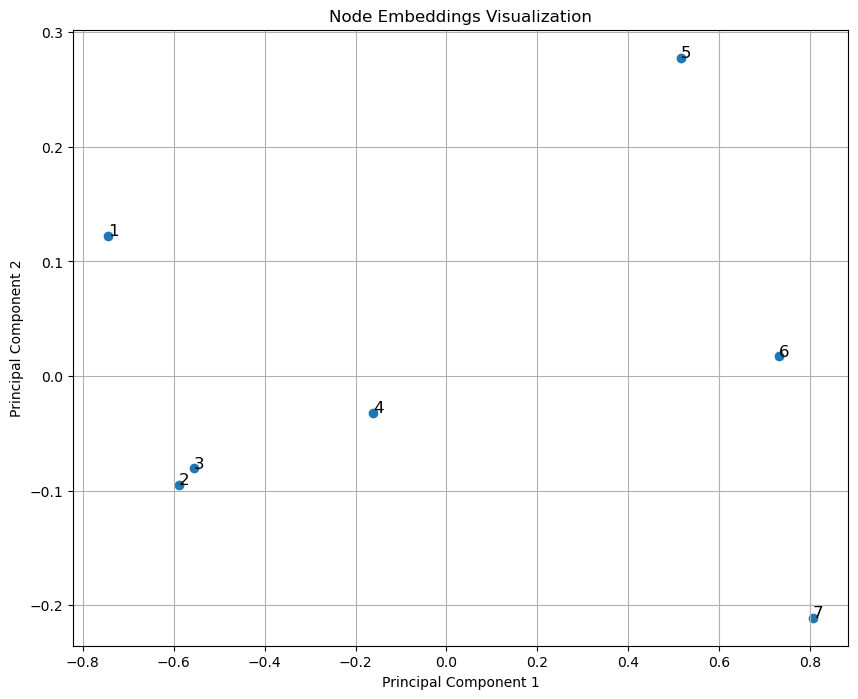

In [2]:
# graph_embedding.py

import networkx as nx
from node2vec import Node2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Create a graph
G = nx.Graph()

# Add nodes and edges
G.add_edges_from([
    (1, 2), (1, 3), (2, 4), (3, 4),
    (4, 5), (5, 6), (6, 7), (7, 5)
])

# Optionally, add node attributes or edge weights
nx.set_node_attributes(G, {1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G'}, 'label')

# Apply Node2Vec
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, sg=1)

# Check if all nodes are in the model's vocabulary
nodes = list(G.nodes())
missing_nodes = [node for node in nodes if str(node) not in model.wv]

if missing_nodes:
    print(f"Warning: Nodes not in the model's vocabulary: {missing_nodes}")

# Get node embeddings, handle missing nodes
embeddings = {node: model.wv[str(node)] for node in G.nodes() if str(node) in model.wv}

# Convert embeddings to a matrix
embedding_matrix = [embeddings[node] for node in G.nodes() if str(node) in model.wv]

# Ensure all nodes are in the embedding matrix
if not embedding_matrix:
    raise ValueError("No valid embeddings found. Ensure the graph nodes are in the model's vocabulary.")

# Perform PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embedding_matrix)

# Create a DataFrame for plotting
df = pd.DataFrame(reduced_embeddings, index=[node for node in G.nodes() if str(node) in model.wv], columns=['x', 'y'])

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(df['x'], df['y'])

for node, (x, y) in df.iterrows():
    plt.text(x, y, str(node), fontsize=12)

plt.title('Node Embeddings Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
